In [1]:
import numpy as np
from pymatreader import read_mat
import os
from torch.utils.data import Dataset
import torch
import librosa
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
from mne.filter import filter_data,resample
from scipy.stats import zscore
from scipy.io import wavfile
from nnAudio import features

In [2]:
gam = features.Gammatonegram(hop_length=1,n_fft=2048,sr=16000)

STFT kernels created, time used = 0.0895 seconds
STFT filter created, time used = 0.0100 seconds
Gammatone filter created, time used = 0.0100 seconds


In [2]:
def load_subject(i):

    dir = "C:/Users/gauta/Thesis/ExJobb/ID" + str(1000+i) +"/PreprocIV_ID" +str(1000+i)+ "_mast.mat"
    temp_data = read_mat(dir)
    temp_data = temp_data['ICAcleaned_data_allsess']
    data = np.vstack([np.array(temp_data['ICAcleaned_data_allsess'][i]['trial'])[:,0:64,256*20:256*53] for i in range(len(temp_data['ICAcleaned_data_allsess']))])
    attended = ["C:/Users/gauta/Thesis/ExJobb/Files_Audio/" + temp_data['ICAcleaned_data_allsess'][k]['targetfiles'][i].split('\\')[-1] for k in range(len(temp_data['ICAcleaned_data_allsess'])) for i in range(20)]
    masker = ["C:/Users/gauta/Thesis/ExJobb/Files_Audio/" + temp_data['ICAcleaned_data_allsess'][k]['maskerfiles'][i].split('\\')[-1] for k in range(len(temp_data['ICAcleaned_data_allsess'])) for i in range(20)]
    

    return (data,attended,masker)

In [3]:
def load_subject(i):

    dir = "C:/Users/gauta/Thesis/ExJobb/ID" + str(1000+i) +"/PreprocIV_ID" +str(1000+i)+ "_mast.mat"
    temp_data = read_mat(dir)
    temp_data = temp_data['ICAcleaned_data_allsess']

    return temp_data

In [4]:
def cvt2env(dirs):
    sr = 16000
    wav = np.array([librosa.load(dir,sr=16000)[0] for dir in dirs])
    env = np.abs(scipy.signal.hilbert(np.array(wav,dtype=np.float64)))
    #env = filter_data(env,sr,None,50,verbose=False,n_jobs='cuda')
    env = scipy.signal.resample_poly(env,128,sr,axis=-1)
    env = np.expand_dims(env,1)
    spec = librosa.feature.melspectrogram(y=wav,hop_length=125,n_fft=2048,n_mels=128,sr=sr)[:,:,1:]
    #spec = filter_data(np.array(spec[1:],dtype=np.float64),sr,None,50,verbose=False,n_jobs='cuda')
    env = np.concatenate([spec,env],axis=1)
    return np.array(env)


In [5]:
def cvt2dirs(dirs):
    dirs =  list(map(lambda x: x.split('\\')[-1],dirs))
    out = [a+b for a,b in zip(["C:/Users/gauta/Thesis/ExJobb/Files_Audio/"]*20,dirs)]
    return out

In [6]:
mode = ["offos","onos","offpol","onpol"]

In [8]:
for i in tqdm(range(1,33)):
    if i==14:
        continue
    trials = load_subject(i)
    for j,trial in enumerate(trials):
        EEG = np.array(trial['trial'])[:,:64,20*256:53*256]
        #EEG = filter_data(EEG,256,None,16,verbose=False,n_jobs='cuda')
        EEG = resample(EEG,128,256)
        #EEG = filter_data(EEG,64,0.5,None,verbose=False,n_jobs='cuda')
        attended = cvt2env(cvt2dirs(trial['targetfiles']))
        masker = cvt2env(cvt2dirs(trial['maskerfiles']))
        for k,(eeg,att,mas) in enumerate(zip(EEG,attended,masker)):
            eeg = zscore(eeg)
            np.savez("Try2/"+mode[j]+"subject_" + str(i) + "_trial_"+ str(k),EEG=eeg,attended=np.squeeze(att),masker=np.squeeze(mas))

  6%|▋         | 2/32 [01:36<24:04, 48.16s/it]


KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt

In [12]:
spec.shape

NameError: name 'spec' is not defined

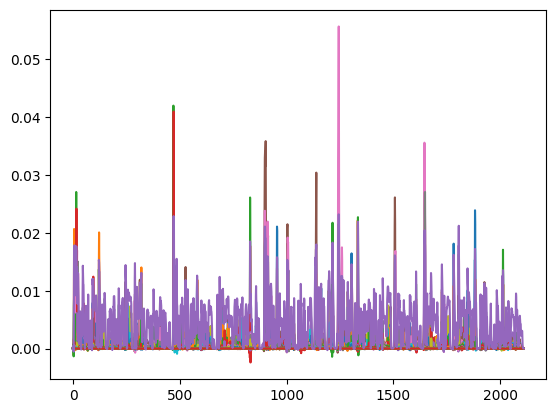

In [14]:
plt.plot(r['attended'].T)

In [12]:
r = np.load(r"C:\Users\gauta\Thesis\PyTorch\Try\offossubject_1_trial_1.npz")

In [13]:
r['attended'].shape

(65, 2112)

In [2]:
def findfiles(search_dir, prefix):
    matching_files = []

    for dirpath, _, filenames in os.walk(search_dir):
        for filename in filenames:
            if filename.startswith(prefix):
                full_path = os.path.join(dirpath, filename)
                matching_files.append(full_path)

    return matching_files

In [34]:
masker.shape

(20, 4224)

In [3]:
k = findfiles("EriksholmFiles/","on")

In [4]:
from eriksdataset import EEG_Dataset

In [5]:
data = EEG_Dataset(files=k,seconds=3,overlap=0.5)

In [6]:
p = data.__getitem__(3)